In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [3]:
def show_delay_plt():
    data = pd.read_csv('output/output.csv')

    plt.scatter(data['distance(Km)'], data['delay(Millisecond)'])
    plt.xlabel('Distance (Km)')
    plt.ylabel('Delay (Millisecond)')
    plt.title('Distance vs. Delay')
    plt.show()

In [4]:
def show_clocks_time():
    data = pd.read_csv('output/berkeley_delay.csv', header=None)
    nodes = []
    for clock in data.iloc[0]:
        nodes.append(clock)
    times = []
    for time in data.iloc[1]:
        data = time.split(".")[1]
        data = data[6:9]+"."+data[9:]
        times.append(float(data))
    plt.bar(nodes, times)
    plt.xlabel('Clock')
    plt.ylabel('Clock Time Error(ns)')
    plt.title('Clock Time Error for Each Clock')
    plt.ylim(min((times))-1,max((times))+1)
    plt.show()

In [5]:
def show_clocks_delay():
    data = []
    with open('output/berkeley_delay.csv', 'r') as file:
        reader = csv.reader(file)
        data = [row for row in reader]
    data.pop(1)
    nodes = data[0]
    values = [float(entry[2]) for entry in data[1:]]

    matrix_size = len(nodes)
    matrix = np.zeros((matrix_size, matrix_size))
    for entry in data[1:]:
        row_index = nodes.index(entry[0])
        col_index = nodes.index(entry[1])
        matrix[row_index, col_index] = float(entry[2])

    plt.imshow(matrix, cmap='viridis', aspect='auto', vmin=0, vmax=np.max(values))

    plt.colorbar(label='Delay(s)')

    plt.xticks(np.arange(matrix_size), nodes)
    plt.yticks(np.arange(matrix_size), nodes)

    for i in range(matrix_size):
        for j in range(matrix_size):
            plt.text(j, i, f'{matrix[i, j]:.4f}', ha='center', va='center', color='white')

    plt.title('Delay Between Every Two Clocks')
    plt.show()

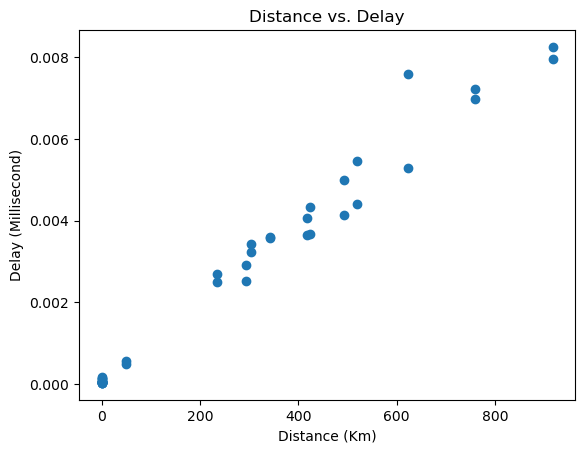

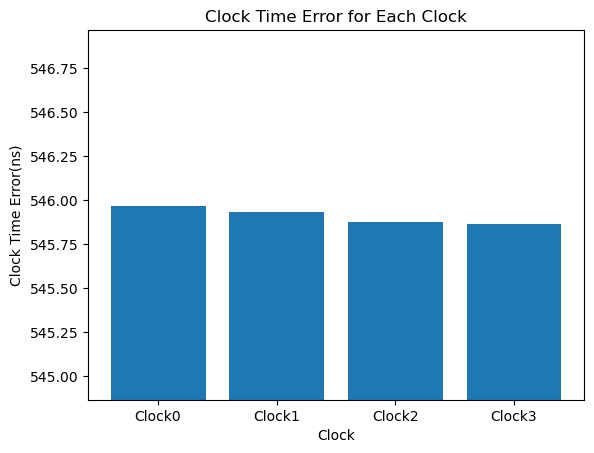

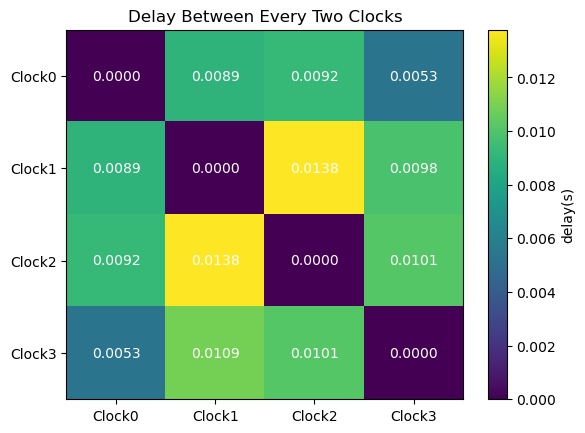

In [6]:
show_delay_plt()
show_clocks_time()
show_clocks_delay()